<a href="https://colab.research.google.com/github/DSNortsev/Algorithms/blob/master/LeetCode_april_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TECH DOSE**

Types of DP:
* Knapsack (O/1, Bounded, Unbounded)
* LCS (Longest Common Subsequence)
* LIS (Longest Increasing Subsequence)
* Matrix chain multiplication 
* DP on grid
* Kadane's Algorithm
* Others

**1. Single number**

In [ ]:
numbers = [2, 4, 2, 4 , 3, 5]

def single_number(numbers):
  result = []
  count_duplicates = {}
  for number in numbers:
    if count_duplicates.get(number):
      count_duplicates[number] += 1
    else:
      count_duplicates[number] = 1
  
  for k, v in count_duplicates.items():
      if v == 1:
        result.append(k)
  return result


single_number(numbers)

[3, 5]

**2. Happy Number** 


In [ ]:
def is_happy(number):
  seen_number = set()

  while True:
      total_sum = 0
      value = 0
      while number > 0:
        number, digit  = divmod(number, 10)
        total_sum += digit ** 2
      
      if total_sum == 1:
        return True
      elif total_sum in seen_number:
        return False
      seen_number.add(total_sum)
      number = total_sum


print(is_happy(19))
print(is_happy(25))

True
False


**3. Longest Sum contiguous subarray**

In [ ]:
def longest_contiguous_subarray(array):
  max_end = 0
  max_total = float('-inf')

  for element in array:
    max_end = max_end + element
    if max_end < element:
      max_end = element
    if max_total < max_end:
      max_total = max_end
  return max_total

longest_contiguous_subarray([-2,-3, 4, -1, -2, 1, 5, -3])

7

**4. Move Zeroes**
Move all zeros to the right 

Example:
Input: [1, 0, 3, 0, 12]

Output: [1, 3, 12, 0, 0]

In [ ]:
def move_zeroes(array: list) -> list:
  """
    Move all zeros to the right
  """
  elm_count = len(array)
  # left is pointer to last zero
  # right is moving towards the end =
  left, right = 0, 0
  
  if elm_count in (0,1):
      return array

  while right < elm_count:
    if array[right] == 0:
      right += 1
    else:
      array[left], array[right] = array[right], array[left]
      right += 1
      left += 1
  return array 

In [ ]:
array1 = [1, 0, 3, 0, 12]
array3 = [1]
array2 = []

print(move_zeroes(array1))
print(move_zeroes(array2))
print(move_zeroes(array3))

[1, 3, 12, 0, 0]
[]
[1]


**5. Best time to buy and sekk stock**

You can buy and sell or skip stocks 

Exmaple:

Input: [7, 1, 5, 3, 6, 4]

Output: 7



In [ ]:
def max_profit(prices: list) -> int:
  """
    Calculate the max profit by buying, selling or skipping the stocks.
    The stock can;t be bought or sold at the same day.
  """
  total_profit = 0
  for indx in range(1,len(prices)):
    if prices[indx] > prices[indx-1]:
       total_profit += prices[indx] - prices[indx-1]
  return total_profit

In [ ]:
# we can not sell on 7 and buy on 4
# (5 - 1) + (6 - 3) = 7
prices1 = [7, 1, 5, 3, 6, 4]
prices2 = [1, 2, 3, 4, 5]
prices3 = [5, 4, 3, 2, 1]

print(max_profit(prices1))
print(max_profit(prices2))
print(max_profit(prices3))

7
4
0


**6. Group Anagrams**

eat and tea are anagrams

In [ ]:
def group_anagrams(words: list) -> list:
  anagrams = {}
  for word in words:
    sorted_letters = "".join(sorted(word))
    if anagrams.get(sorted_letters):
      anagrams[sorted_letters].append(word)
    else:
      anagrams[sorted_letters] = [word]
  
  return list(anagrams.values())

In [ ]:
words = ['eat', 'tea', 'tan', 'ate', 'nat', 'bat']
print(group_anagrams(words))

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


**7. Counting elements**

Counting numnber of x of (x+1) is present in an array.

In [ ]:
def count_elements(numbers: list) -> int:
  """
    Counting numnber of x of (x+1) is present in an array.
  """
  total_count = len(numbers)
  sorted_numbers = sorted(numbers)
  left, right, count = 0, 1, 0

  while right < total_count:
    if sorted_numbers[right] == sorted_numbers[left] + 1:
      count += right - left
      left = right
      right += 1
    elif sorted_numbers[right] == sorted_numbers[left]:
      right += 1
    else:
      left = right
      right += 1
  return count

In [ ]:
numbers = [1, 3, 2, 3, 5, 0]
# [0, 1, 2, 3, 3, 5], so count would be 3 which is 0-1, 1-2, 2-3
print(count_elements(numbers))

3


**8. Middle of link list**



In [ ]:
def middle_of_link_list(array: list) -> list:
  total_elements = len(array)

  if total_elements <= 2:
    return array
  
  indx = total_elements // 2
  if total_elements % 2 == 0:
    return [array[indx-1], array[indx]]
  return [array[indx]]

In [ ]:
print(middle_of_link_list([]))
print(middle_of_link_list([1]))
print(middle_of_link_list([1, 2]))
print(middle_of_link_list([1,2,3]))
print(middle_of_link_list([1,2,3,4]))

[]
[1]
[1, 2]
[2]
[2, 3]


**9.Backspcae string compare**

\# means backspace remoing an character

ab#cd# = ac

ac# = a

In [ ]:
def backspace_string_compare(string1: str, string2: str) -> bool:
  processed_str = {
    "result1": '',
    "result2": ''
  }

  for indx, string in enumerate([string1, string2],1):
    for character in string:
      if character.islower():
        processed_str[f'result{indx}'] += character
      else:
        processed_str[f'result{indx}'] = processed_str[f'result{indx}'][:-1]   
  return processed_str['result1'] == processed_str['result2']

In [ ]:
string1 = 'ab#cd#'
string2 = 'ac#d#c'
print(backspace_string_compare(string1, string2))

True


**10.Diameter of Binary Tree**


In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        height,diameter=self.help(root)
        return diameter
    
    def help(self,root):
        if not root:
            return 0,0
        left_height,left_diam=self.help(root.left)
        right_height,right_diam=self.help(root.right)
        height=max(left_height,right_height)+1
        return height,max(left_height+right_height,left_diam,right_diam)

**11.Last stone weight**


In [ ]:
from typing import List

def last_stone_weight(stones: List[int]) -> int:
  while len(stones) > 1:
    stones = sorted(stones)
    x = stones.pop(-1)
    y = stones.pop(-1)
    if x != y:
      stones.append(x - y)
  return  stones[0] if stones else 0

In [ ]:
# O(nlogn) with Heap
from typing import List
from heapq import heappush, heappop

def last_stone_weight(stones: List[int]) -> int:
    heap = []
    for stone in stones: # O(n)
        heappush(heap, -stone) # O(logn)
    print(heap)
    
    while len(heap) > 1:
        y = heappop(heap)
        x = heappop(heap)
        
        if x > y: heappush(heap, y - x)
            
    return abs(heappop(heap)) if heap else 0


In [ ]:
stones1 = [2, 7, 4, 10]
stones2 = [2, 7]
stones3 = [3]
stones4 = []

print(last_stone_weight(stones1))
print(last_stone_weight(stones2))
print(last_stone_weight(stones3))
print(last_stone_weight(stones4))

[-10, -7, -4, -2]
1
[-7, -2]
5
[-3]
3
[]
0


**12.Contiguous array**


In [ ]:
def find_max_length_binary(binary_array: list) -> int:
  sum = 0 
  longest_subarray = 0
  sum_dictioary = {}

  for i in range(len(binary_array)):
    sum += 1 if binary_array[i] != 0 else -1

    if sum == 0:
      longest_subarray = i + 1 if longest_subarray < i + 1 else longest_subarray
    elif sum in sum_dictioary:
      longest_subarray = max(longest_subarray, i - sum_dictioary[sum])
    else:
      sum_dictioary[sum] = i
  return longest_subarray


In [ ]:
array1 = [0,1]
array2 = [0,1,0,1,0,1]
array3 = [0,1,0,1,0,0]

print(find_max_length_binary(array1))
print(find_max_length_binary(array2))
print(find_max_length_binary(array3))

2
6
4


**13.Perfrom string shifts**

You are given a string s containing lowercase English letters, and a matrix shift, where shift[i] = [directioni, amounti]:

    directioni can be 0 (for left shift) or 1 (for right shift).
    amounti is the amount by which string s is to be shifted.
    A left shift by 1 means remove the first character of s and append it to the end.
    Similarly, a right shift by 1 means remove the last character of s and add it to the beginning.

Return the final string after all operations.

```
Input: s = "abcdefg", shift = [[1,1],[1,1],[0,2],[1,3]]
Output: "efgabcd"
Explanation:  
[1,1] means shift to right by 1. "abcdefg" -> "gabcdef"
[1,1] means shift to right by 1. "gabcdef" -> "fgabcde"
[0,2] means shift to left by 2. "fgabcde" -> "abcdefg"
[1,3] means shift to right by 3. "abcdefg" -> "efgabcd"
```

 

In [ ]:
def string_shift(string: str, vectors: list) -> str:
  val = 0
  result = ''

  for vector in vectors:
    # 0 is left rotation and negative value 
    # 1 is right rotation and postive value
    val += -vector[1] if vector[0] == 0 else vector[1]

  length = len(string)
  val %= length
  print(val)
  if val > 0:
    # Right rotation
    result = string[length-val:] + string[:length-val]
  elif val < 0:
    # Left roration
    # Remove negative sign
    val = abs(val)
    result = string[length-val:] + string[:length-val]
  return result  

In [ ]:
string = "abcdefg"
vectors = [[1,1],[1,1],[0,2],[1,3]]
print(string_shift(string, vectors))

3
efgabcd


**14.Product of array except self**

In [ ]:
import math 

def product_of_array(array: list) -> list:
  total_product = 1
  for element in array:
    total_product *= element
  
  return [total_product//element for element in array]

In [ ]:
input1 = []
input2 = [1]
input3 = [1, 2]
input4 = [1,2,3,4]

print(product_of_array(input1))
print(product_of_array(input2))
print(product_of_array(input3))
print(product_of_array(input4))

[]
[1]
[2, 1]
[24, 12, 8, 6]


**15. Valid parenthesis String**

In [ ]:
def check_valid_string(string: str) -> bool:
  open, star = [], []
  length = len(string)
  for indx in range(length):
    if string[indx] == '(':
      open.append(indx)
    elif string[indx] == '*':
      star.append(indx)
    else:
      if open:
        # First pop from open stack
        open.pop()
      elif star:
        # Pop from star stack
        star.pop()
      else:
        # Can't balance the string
        return False

  # Now processing leftover openning brackets
  while open:
    if not star:
      return False
    elif open[-1] < star[-1]:
      open.pop()
      star.pop()
    else:
      return False
  return True

In [ ]:
string1 = "()"
string2 =  "(*)"
string3 =  "(*))"
string4 = ")(*))"

print(check_valid_string(string1))
print(check_valid_string(string2))
print(check_valid_string(string3))
print(check_valid_string(string4))

True
True
True
False


**16.Number of Islands**

Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.

In [39]:
from typing import List

def num_islands(grid: List[List[str]]) -> int:
  num_islands = 0

  if not grid or not grid[0]:
    return 0

  for i,row in enumerate(grid):
    for j,cell in enumerate(row):
      if cell == "1":
        num_islands += 1
        grid = delete_island(grid, i, j)
        print(grid)
  return num_islands

def delete_island(grid, i, j):
  if grid[i][j] == "1":
    grid[i][j] = "0"
    if i > 0:
      # Up
      grid = delete_island(grid,i-1,j)
    if i < len(grid)-1:
      #Down
      grid = delete_island(grid,i+1,j)
    if j > 0:
      # Left
      grid = delete_island(grid,i,j-1)
    if j < len(grid[0])-1:
      # Right
      grid = delete_island(grid,i,j+1)
  return grid

In [45]:
grid1 = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]

grid2 = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

grid3 = []
grid4 = [[]]

print(num_islands(grid1))
print(num_islands(grid2))
print(num_islands(grid3))
print(num_islands(grid4))

[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '1', '0', '0'], ['0', '0', '0', '1', '1']]
[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '1', '1']]
[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0']]
3
[['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0']]
1
0
0


**17. Minimum path sum**

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

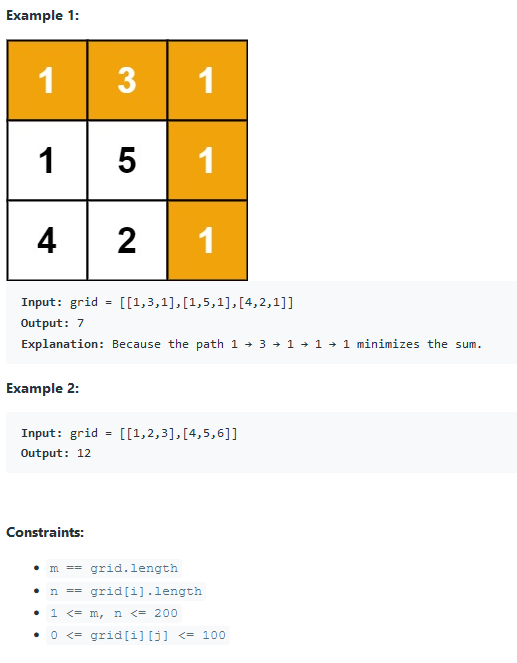


In [69]:
from typing import List

def min_path_sum(grid: List[List[int]]) -> int:
  """
    :type grid: List[List[int]]
    :rtype: int
  """
  row, col = len(grid), len(grid[0])
  dis = [ [0 for c in range(col)] for r in range(row)]
  dis[0][0] = grid[0][0]
  # Going down first row
  for i in range(1, row):
    dis[i][0] = dis[i-1][0] + grid[i][0]
  # Going right first column
  for i in range(1, col):
    dis[0][i] = dis[0][i-1] + grid[0][i]
  # Fill out the reset
  for i in range(1, row):
    for j in range(1, col):
      dis[i][j] = grid[i][j] + min(dis[i-1][j], dis[i][j-1])
  return dis[-1][-1]

In [70]:
grid1 = [
  [1,3,1],
  [1,5,1],
  [4,2,1]
]

grid2 = [
  [1,2,3],
  [4,5,6]
]

print(min_path_sum(grid1))
print(min_path_sum(grid2))

7
12


**18.Search in rotated sorted array**

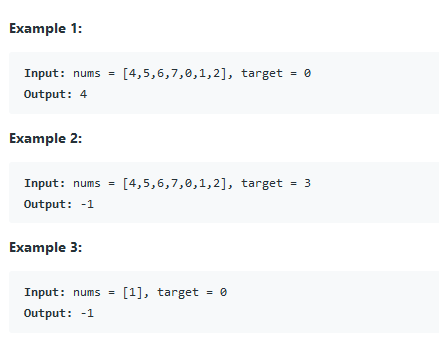

In [75]:
# Formula: If a sorted array is shifted, if you take the middle, always one side will be sorted. Take the recursion according to that rule.

# 1- take the middle and compare with target, if matches return.
# 2- if middle is bigger than left side, it means left is sorted
# 2a- if [left] < target < [middle] then do recursion with left, middle - 1 (right)
# 2b- left side is sorted, but target not in here, search on right side middle + 1 (left), right
# 3- if middle is less than right side, it means right is sorted
# 3a- if [middle] < target < [right] then do recursion with middle + 1 (left), right
# 3b- right side is sorted, but target not in here, search on left side left, middle -1 (right)

def search(nums: List[int], target: int) -> int:
  """
  Rule of thumb: If a sorted array is shifted, if you take the middle, 
  always one side will be sorted. Take the recursion according to that rule
  """

  low, high = 0, len(nums) - 1

  while low <= high:
      
      mid = low + (high-low) // 2
      print(f"low {low}, high {high}, mid {mid}")
            
      # 1- take the middle and compare with target, if matches return.
      if nums[mid] == target:
          return mid
      
      # 2- if middle is bigger than left side, it means left is sorted
      elif nums[low] <= nums[mid]:
          if target >= nums[low] and target < nums[mid]:
              high = mid - 1
          else:
              low = mid + 1
      # 3- if middle is lower than left side, it means right is sorted
      else:
          if target > nums[mid] and target <= nums[high]:
              low = mid + 1
          else:
              high = mid - 1
  return -1


In [74]:
nums1 = [4,5,6,7,0,1,2]
target1 = 0

nums2 = [4,5,6,7,0,1,2]
target2 = 3

nums3 = [1]
target3 = 0

print(search(nums1, target1))
print(search(nums2, target2))
print(search(nums3, target3))


low 0, high 6, mid 3
low 4, high 6, mid 5
low 4, high 4, mid 4
4
low 0, high 6, mid 3
low 4, high 6, mid 5
low 6, high 6, mid 6
-1
low 0, high 0, mid 0
-1
